<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0731/15_1_(practice)model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델 성능 평가

## Load model file

In [3]:
!git clone https://github.com/theAIGuysCode/tensorflow-yolov4-tflite

Cloning into 'tensorflow-yolov4-tflite'...
remote: Enumerating objects: 912, done.
remote: Total 912 (delta 0), reused 0 (delta 0), pack-reused 912
Receiving objects: 100% (912/912), 211.46 MiB | 29.17 MiB/s, done.
Resolving deltas: 100% (439/439), done.


In [21]:
%cd /content/tensorflow-yolov4-tflite

/content/tensorflow-yolov4-tflite


In [5]:
req_gpu_text = '''tensorflow-gpu==2.5.0
opencv-python==4.7.0.72
lxml
tqdm
absl-py
matplotlib
easydict
pillow
'''

with open('requirements-gpu.txt', 'w') as f:
    f.write(req_gpu_text)

In [22]:
!pip install -r requirements-gpu.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 104.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 63.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-server-0.7.1
  Attempting uninstall: google-auth-oauthlib
    Found existing inst

In [6]:
%cd /content/tensorflow-yolov4-tflite/data

/content/tensorflow-yolov4-tflite/data


In [7]:
!pip install -U --no-cache-dir gdown --pre

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [8]:
%cd /content/tensorflow-yolov4-tflite/data/classes

/content/tensorflow-yolov4-tflite/data/classes


In [9]:
# 구글 드라이브 파일에서 names을 colab으로 다운로드
!gdown 1Ea9iydXmibS1bDnlVRsPhK4E9r-yifyT

Downloading...
From: https://drive.google.com/uc?id=1Ea9iydXmibS1bDnlVRsPhK4E9r-yifyT
To: /content/tensorflow-yolov4-tflite/data/classes/ClassNames.names
100% 12.0/12.0 [00:00<00:00, 64.7kB/s]


In [10]:
%cd /content/tensorflow-yolov4-tflite

/content/tensorflow-yolov4-tflite


In [11]:
# pb버전의 yolo v4_mask model
!gdown 1ThK0ywQ2wiG62oT3ud5GmHxfiY_DUxkj

Downloading...
From (uriginal): https://drive.google.com/uc?id=1ThK0ywQ2wiG62oT3ud5GmHxfiY_DUxkj
From (redirected): https://drive.google.com/uc?id=1ThK0ywQ2wiG62oT3ud5GmHxfiY_DUxkj&confirm=t&uuid=e392a988-3e66-435d-87c2-cfb912be5fc2
To: /content/tensorflow-yolov4-tflite/yolov4-416.zip
100% 238M/238M [00:01<00:00, 177MB/s]


In [12]:
!unzip yolov4-416.zip # /content/tensorflow-yolov4-tflite/yolov4-416

Archive:  yolov4-416.zip
   creating: yolov4-416/assets/
  inflating: yolov4-416/saved_model.pb  
   creating: yolov4-416/variables/
  inflating: yolov4-416/variables/variables.data-00000-of-00001  
  inflating: yolov4-416/variables/variables.index  


## Modify config file
- YOLO.CLASSES : 커스텀 데이터셋 파일 경로로 수정

In [13]:
!pwd

/content/tensorflow-yolov4-tflite


In [13]:
# yolov4 tensorflow model 실행
!python detect.py --weights ./yolov4-416 --size 416 --model yolov4 --images ./data/images/mask_01.jpg

2023-07-31 05:20:57.550769: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 05:20:58.558540: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-31 05:21:00.488729: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-31 05:21:01.026534: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

## Evaluate pascal voc model

In [ ]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar

--2022-12-14 03:14:48--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/x-tar]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  29.5MB/s    in 16s     

2022-12-14 03:15:05 (27.0 MB/s) - ‘VOCtrainval_06-Nov-2007.tar’ saved [460032000/460032000]

--2022-12-14 03:15:05--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[==========

        VOC           
        ├── test
        |    └──VOCdevkit
        |        └──VOC2007 (from VOCtest_06-Nov-2007.tar)
        └── train
            └──VOCdevkit
                └──VOC2007 (from VOCtrainval_06-Nov-2007.tar)
                └──VOC2012 (from VOCtrainval_11-May-2012.tar)

In [ ]:
!mkdir VOC
!mkdir VOC/train
!mkdir VOC/test

In [ ]:
%cd /content/tensorflow-yolov4-tflite/VOC/test
!tar -xf /content/tensorflow-yolov4-tflite/VOCtest_06-Nov-2007.tar

/content/tensorflow-yolov4-tflite/VOC/test


In [ ]:
%cd /content/tensorflow-yolov4-tflite/VOC/train
!tar -xf /content/tensorflow-yolov4-tflite/VOCtrainval_06-Nov-2007.tar
!tar -xf /content/tensorflow-yolov4-tflite/VOCtrainval_11-May-2012.tar

/content/tensorflow-yolov4-tflite/VOC/train


In [ ]:
%cd /content/tensorflow-yolov4-tflite
!python scripts/voc_annotation.py --data_path VOC

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003167.jpg 235,293,337,362,1 1,96,180,480,14 159,130,238,443,14
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003168.jpg 277,230,499,375,1 29,236,160,375,1 37,82,204,375,14 300,25,497,375,14 365,48,416,80,4
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003169.jpg 28,24,451,333,1
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003171.jpg 137,76,360,220,2
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003176.jpg 31,78,472,231,0 285,214,307,229,6
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003177.jpg 2,31,459,237,0 399,54,500,110,0
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003182.jpg 1,22,500,375,17
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003183.jpg 176,197,374,330,10 169,203,248,329,8 260,208,332,328,8 218,188,283,301,8 286,191,349,301,8
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003184.jpg 152,1,499,375,12
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003185.jpg 1,65,500,367,6 50,1,438,333,14
VOC/train/VOCdevkit/V

 ./core/config.py 수정  

        __C.YOLO.CLASSES                = "./data/classes/voc.names"
        __C.TRAIN.ANNOT_PATH            = "./data/dataset/voc_train.txt"
        __C.TEST.ANNOT_PATH             = "./data/dataset/voc_test.txt"

In [ ]:
%cd /content/tensorflow-yolov4-tflite/

/content/tensorflow-yolov4-tflite


In [ ]:
!pwd

/content/tensorflow-yolov4-tflite


In [ ]:
# voc data로 학습된 model을 weights에 할당해줘야 합니다.
!python evaluate.py --weights ./yolov4-416 --annotation_path ./data/dataset/voc_test.txt

2022-12-14 03:53:41.678722: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-14 03:53:41.678769: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-14 03:53:43.037972: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-12-14 03:53:43.846173: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2022-12-14 03:53:43.846323: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: lib

In [ ]:
%cd /content/tensorflow-yolov4-tflite/mAP

/content/tensorflow-yolov4-tflite/mAP


In [ ]:
!python main.py

0.00% = aeroplane AP  
0.00% = bicycle AP  
0.00% = bird AP  
0.00% = boat AP  
0.00% = bottle AP  
0.00% = bus AP  
0.00% = car AP  
0.00% = cat AP  
0.00% = chair AP  
0.00% = cow AP  
0.00% = diningtable AP  
0.00% = dog AP  
0.00% = horse AP  
0.00% = motorbike AP  
0.00% = person AP  
0.00% = pottedplant AP  
0.00% = sheep AP  
0.00% = sofa AP  
0.00% = train AP  
0.00% = tvmonitor AP  
mAP = 0.00%
Figure(640x480)


## Download custom-testset

In [14]:
# custom testset(mask, no-mask)
!gdown 1X5lHjYeyTDSWonC6iuGx9FjHo6qCsKRP

Downloading...
From: https://drive.google.com/uc?id=1X5lHjYeyTDSWonC6iuGx9FjHo6qCsKRP
To: /content/tensorflow-yolov4-tflite/mask_images.zip
100% 3.67M/3.67M [00:00<00:00, 246MB/s]


## Evaluate custom model

In [ ]:
!unzip mask_images.zip

In [23]:
%cd /content

/content


In [17]:
import glob

In [18]:
filenames = glob.glob('/content/tensorflow-yolov4-tflite/images/*.txt')
filenames

['/content/tensorflow-yolov4-tflite/images/1125506397_15801322206131n_jpg.rf.da8fa082b994849888e09bb86b146aa0.txt',
 '/content/tensorflow-yolov4-tflite/images/soooo_jpg.rf.accf5a6d0b0fe444b354a2d293821715.txt',
 '/content/tensorflow-yolov4-tflite/images/r1000019q689461s9r0_jpg.rf.ae75478d4b2292f9d43a58dc102771df.txt',
 '/content/tensorflow-yolov4-tflite/images/10fea_8011463765e2aa28b386cf_jpg.rf.0b90546b568e369f33ca67b3208b1655.txt',
 '/content/tensorflow-yolov4-tflite/images/1422808187-3291816118_jpg.rf.d9c28ba7c110caac049036d25e367b65.txt',
 '/content/tensorflow-yolov4-tflite/images/w1240-p16x9-CORONAVIRUS-CHINA-HEALTH-APPLE_STORE_jpg.rf.8f83c6922f9fa841301e6722c35ec9e4.txt',
 '/content/tensorflow-yolov4-tflite/images/-1x-1_jpg.rf.8d697c00929e06e6655c08835cc66c02.txt',
 '/content/tensorflow-yolov4-tflite/images/15-08608-001_jpg.rf.f23eeb640db01b5c025ae54c9c6f3d7f.txt',
 '/content/tensorflow-yolov4-tflite/images/phplpE73q_jpg.rf.bd81cab9f8ff2674ce2e58278f7d37fa.txt',
 '/content/tensor

In [22]:
len(filenames)

149

In [35]:
import cv2
imgfile_paths = glob.glob('/content/tensorflow-yolov4-tflite/images/*.jpg')
img = cv2.imread(imgfile_paths[0] )
height, width = img.shape[:2]

t = open('mask_test.txt', 'w')

annots = ''
for filename in filenames:
    with open(filename) as f:
    # 저장 형식 : <imgfile_path> <xmin>,<ymin>,<xmax>,<ymax>,<label>
        lines = f.readlines()
        # lines[0] = label xc yc w h

        elements = ''
        for imgfile_path in imgfile_paths:
            elements += imgfile_path

            for line in lines:
                label, xc, yc, w, h = line.split()
                xmin = int((float(xc) - float(w)/2)* width)
                ymin = int((float(yc) - float(h)/2)* height)
                xmax = int((float(xc) + float(w)/2)* width)
                ymax = int((float(yc) + float(h)/2)* height)

                element = f' {xmin},{ymin},{xmax},{ymax},{label}'
                elements += element
    annots += elements + ' '
t.write(annots)


4920278

In [36]:
annots

'/content/tensorflow-yolov4-tflite/images/RZXE24HFK5GSVKVSN57VCVPQ4M_jpg.rf.b60c1ee75de4ff9d4259198376ebb277.jpg 20,110,40,141,0 63,124,84,150,0 226,106,256,139,0 317,97,350,136,0 133,87,196,154,0/content/tensorflow-yolov4-tflite/images/1000x-1_jpg.rf.743291b4977f67bdd59a05ee98c9e28b.jpg 20,110,40,141,0 63,124,84,150,0 226,106,256,139,0 317,97,350,136,0 133,87,196,154,0/content/tensorflow-yolov4-tflite/images/sars-gettyimages-157005245_jpg.rf.5f33a6bd1f780b98e348507f3835d4d6.jpg 20,110,40,141,0 63,124,84,150,0 226,106,256,139,0 317,97,350,136,0 133,87,196,154,0/content/tensorflow-yolov4-tflite/images/10fea_8011463765e2aa28b386cf_jpg.rf.0b90546b568e369f33ca67b3208b1655.jpg 20,110,40,141,0 63,124,84,150,0 226,106,256,139,0 317,97,350,136,0 133,87,196,154,0/content/tensorflow-yolov4-tflite/images/the-first-day-of-wuhan-s-closure-some-people-fled-some-panicked_jpg.rf.0302fefb0879eb37736a704ca5d070ff.jpg 20,110,40,141,0 63,124,84,150,0 226,106,256,139,0 317,97,350,136,0 133,87,196,154,0/con

In [ ]:
t = open('mask_test.txt', 'w')

annots = ''
for filename in filenames:
    with open(filename) as f:
    # 저장 형식 : <imgfile_path> <xmin>,<ymin>,<xmax>,<ymax>,<label>
        lines = f.readlines()
        # lines[0] = label xc yc w h
        elements = ''
        elements += 'imgfile_path'
        for line in lines:
            label, xc, yc, w, h = line.split()
            xmin = float(xc) - float(w)/2
            ymin =
            xmax =
            ymax =

            element = f' {xmin},{ymin},{xmax},{ymax},{label}'
            elements += element
    annots += elements + '\n'
t.write(annots)


/content/tensorflow-yolov4-tflite/images/RTX1GIDS_jpg.rf.5b4032f806a5d6f517ee374f27bd1f63.jpg
/content/tensorflow-yolov4-tflite/images/101d6660a8974050b613dd2e6bd59390_jpg.rf.d2571bc2121193beb8e9f49af8fc7170.jpg
/content/tensorflow-yolov4-tflite/images/1288788-une-employee-aide-des-voyageurs-en-provenance-de-chine-le-26-janvier-2020-a-l-aeroport-de-roissy_jpg.rf.f896f89876de52df2fed7086bc94d1fd.jpg
/content/tensorflow-yolov4-tflite/images/shutterstock_1627199179_jpg.rf.8432d033a37b3d142ec4ffcede508c7d.jpg
/content/tensorflow-yolov4-tflite/images/1197315184_jpg_0_jpg.rf.39eb63061e0efb89a8f12a31d676daea.jpg
/content/tensorflow-yolov4-tflite/images/shutterstock_1145933543-e1579497052960_jpg.rf.f3807b96202c59d946e24047e52e92d0.jpg
/content/tensorflow-yolov4-tflite/images/15391513329330sooq10859_jpg.rf.89c8524c2096175fa2c728e5d73f1c28.jpg
/content/tensorflow-yolov4-tflite/images/000_1OC3DT_jpg.rf.0570a1f4ab79e324496c311456b6b1f8.jpg
/content/tensorflow-yolov4-tflite/images/r1000019q679o5611

33170

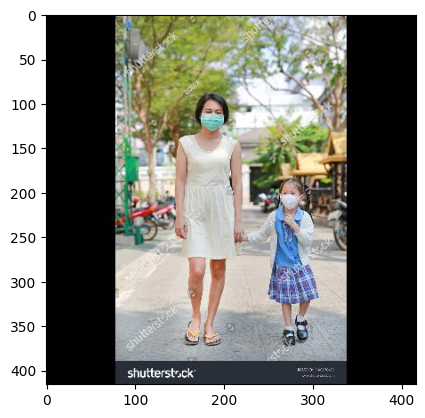

In [40]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('/content/tensorflow-yolov4-tflite/images/stock-photo-mother-and-her-daughter-walking-go-to-school-with-wearing-a-protection-mask-against-pm-air-1346870465_jpg.rf.a6b929aae5f5f3dc8beac91039f8c85a.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [38]:
%cd /content/tensorflow-yolov4-tflite/

/content/tensorflow-yolov4-tflite


- core/config.py 설정값 커스텀데이터로 변경  
    - YOLO.CLASSES
    - TEST.ANNOT_PATH

In [39]:
!python evaluate.py --weights ./yolov4-416 --annotation_path /content/mask_test.txt

2023-07-31 06:28:03.134755: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
[ WARN:0@21.912] global loadsave.cpp:244 findDecoder imread_('/media/user/Source/Data/coco_dataset/coco/images/val2017/000000299609.jpg'): can't open/read file: check file path/integrity
Traceback (most recent call last):
  File "/content/tensorflow-yolov4-tflite/evaluate.py", line 139, in <module>
    app.run(main)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 254, in _run_main
    sys.exit(main(argv))
  File "/content/tensorflow-yolov4-tflite/evaluate.py", line 59, in main
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in functi

In [ ]:
%cd /content/tensorflow-yolov4-tflite/mAP

/content/tensorflow-yolov4-tflite/mAP


In [ ]:
!python main.py

88.13% = mask AP  
87.52% = no-mask AP  
mAP = 87.82%
Figure(640x480)
